In [41]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from math import radians, cos, sin, asin, sqrt

In [42]:
data = pd.read_csv('Shinkansen_stations_inJapan_with_coordinates.csv')

In [43]:
data_A = data[~data['Shinkansen_Line'].str.contains(",")].copy()


data_doubles = data[data['Shinkansen_Line'].str.contains(",")].reset_index().drop(["index"], axis = 1).copy()

double_lines_series_1 = []
double_lines_series_2 = []

for k in data_doubles['Shinkansen_Line']:
    double_lines_series_1.append(k[k.find(",")+1:])
    double_lines_series_2.append(k[:k.find(",")])

double_lines_series_1 = pd.Series(double_lines_series_1)
double_lines_series_2 = pd.Series(double_lines_series_2)

data_doubles1 = data_doubles.copy()
data_doubles2 = data_doubles.copy()

data_doubles1['Shinkansen_Line'] = double_lines_series_1
data_doubles2['Shinkansen_Line'] = double_lines_series_2

data_B = pd.concat([data_doubles1, data_doubles2], axis=0, ignore_index=True)
data_fused = pd.concat([data_A, data_B], axis=0, ignore_index=True)

In [61]:
shinkansen_lines = dict()
line_colors = {
    'Tokaido_Shinkansen': '#800000',
    'Sanyo_Shinkansen': '#800080',
    'Tohoku_Shinkansen': '#808000',
    'Joetsu_Shinkansen': '#008000',
    'Yamagata_Shinkansen': '#008080',
    'Akita_Shinkansen': '#000080',
    'Hokuriku_Shinkansen': '#404080',
    'Kyushu_Shinkansen': '#408040',
    'Hokkaido_Shinkansen': '#804040',
    'Nishi_Kyushu_Shinkansen': '#000000'
}
company_colors = {
    'JR_Central': 'orange',
    'JR_West': 'blue',
    'JR_East': 'green',
    'JR_Hokkaido': 'purple',
    'JR_Kyushu': 'red'
}

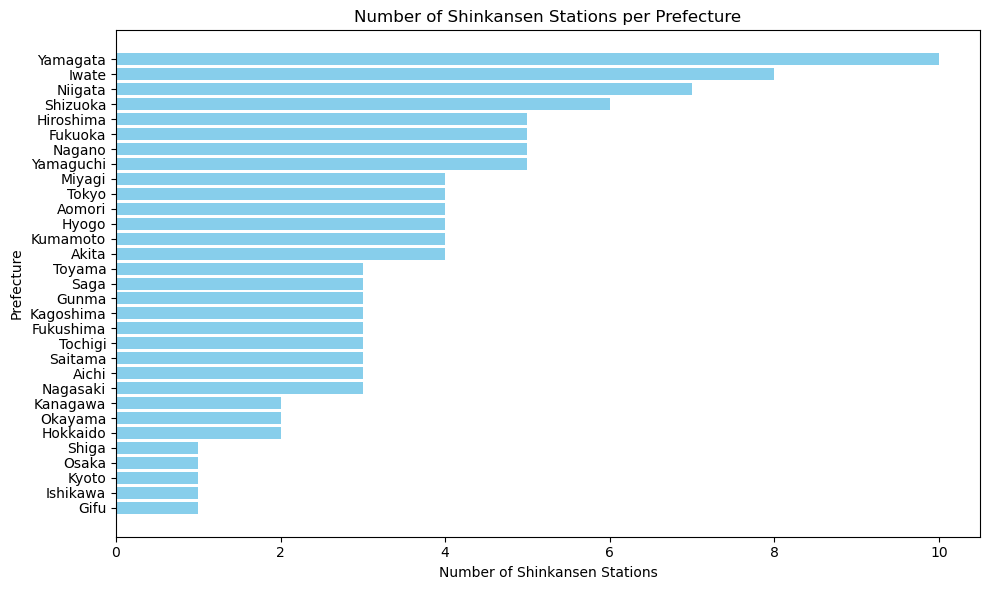

In [45]:
stations_per_prefecture = data['Prefecture'].value_counts()
stations_per_prefecture = stations_per_prefecture.sort_values(ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(stations_per_prefecture.index, stations_per_prefecture.values, color='skyblue')

plt.xlabel('Number of Shinkansen Stations')
plt.ylabel('Prefecture')
plt.title('Number of Shinkansen Stations per Prefecture')

# Show the plot
plt.tight_layout()
plt.show()

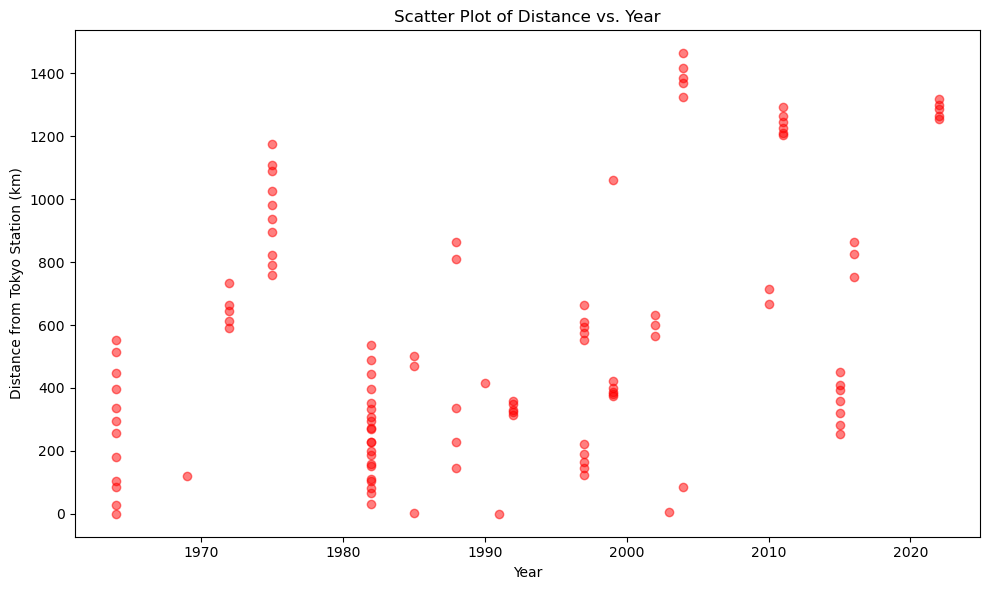

In [46]:
distance = data['Distance_from_Tokyo_st']
year = data['Year']
plt.figure(figsize=(10, 6))
plt.scatter(year, distance, color='red', alpha=0.5)
plt.xlabel('Year')
plt.ylabel('Distance from Tokyo Station (km)')
plt.title('Scatter Plot of Distance vs. Year')
plt.tight_layout()
plt.show()

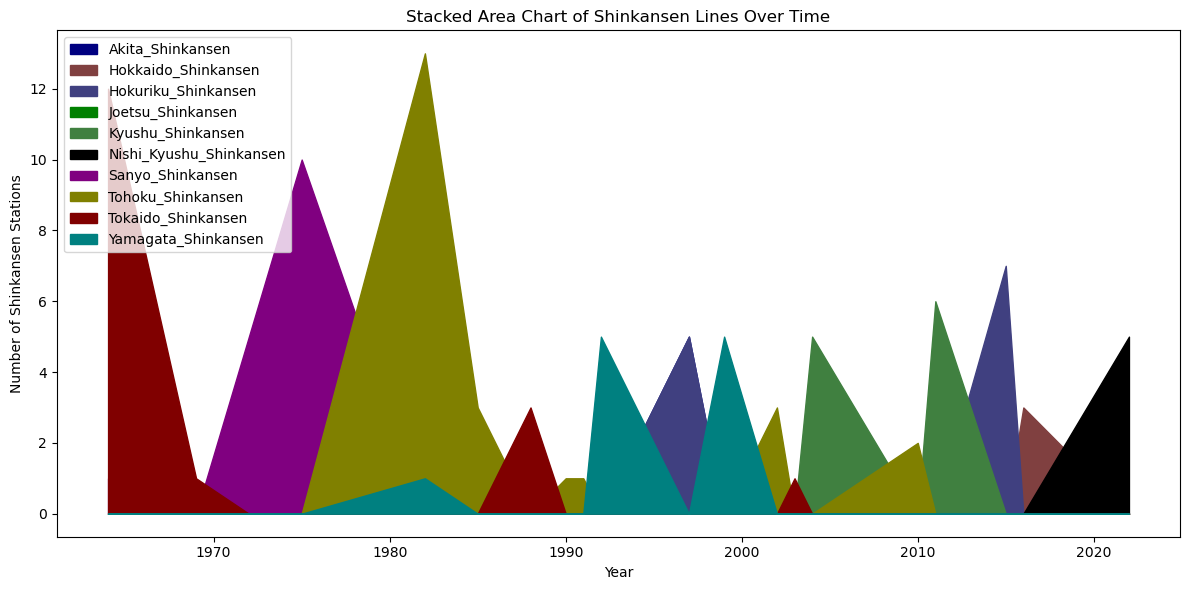

In [47]:
lines_over_time = data_fused.groupby(['Year', 'Shinkansen_Line']).size().unstack(fill_value=0)
plt.figure(figsize=(12, 6))
for line in lines_over_time.columns:
    color = line_colors.get(line, 'gray')  # Get the color from the line_colors dictionary
    plt.fill_between(lines_over_time.index, lines_over_time[line], color=color, label=line)

plt.xlabel('Year')
plt.ylabel('Number of Shinkansen Stations')
plt.title('Stacked Area Chart of Shinkansen Lines Over Time')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


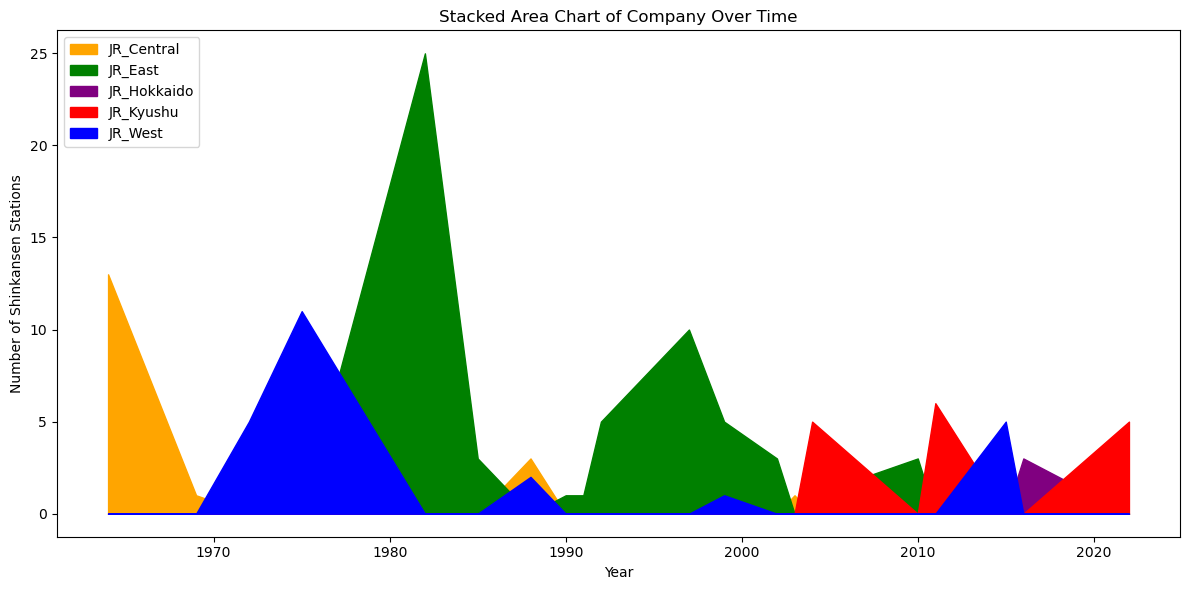

In [62]:
lines_over_time = data_fused.groupby(['Year', 'Company']).size().unstack(fill_value=0)
plt.figure(figsize=(12, 6))
for line in lines_over_time.columns:
    color = company_colors.get(line, 'gray')  # Get the color from the line_colors dictionary
    plt.fill_between(lines_over_time.index, lines_over_time[line], color=color, label=line)

plt.xlabel('Year')
plt.ylabel('Number of Shinkansen Stations')
plt.title('Stacked Area Chart of Company Over Time')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

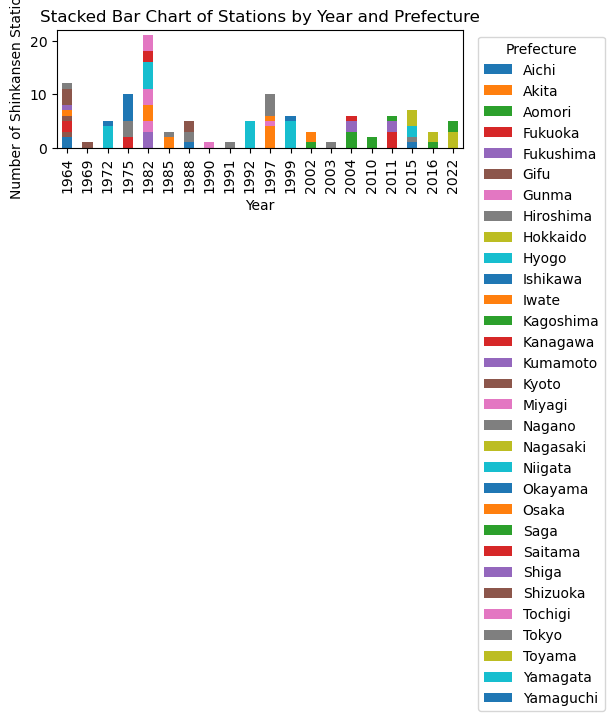

In [48]:
stations_by_year_prefecture = data.groupby(['Year', 'Prefecture']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
stations_by_year_prefecture.plot(kind='bar', stacked=True)

plt.xlabel('Year')
plt.ylabel('Number of Shinkansen Stations')
plt.title('Stacked Bar Chart of Stations by Year and Prefecture')

plt.legend(title='Prefecture', bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout()
plt.show()

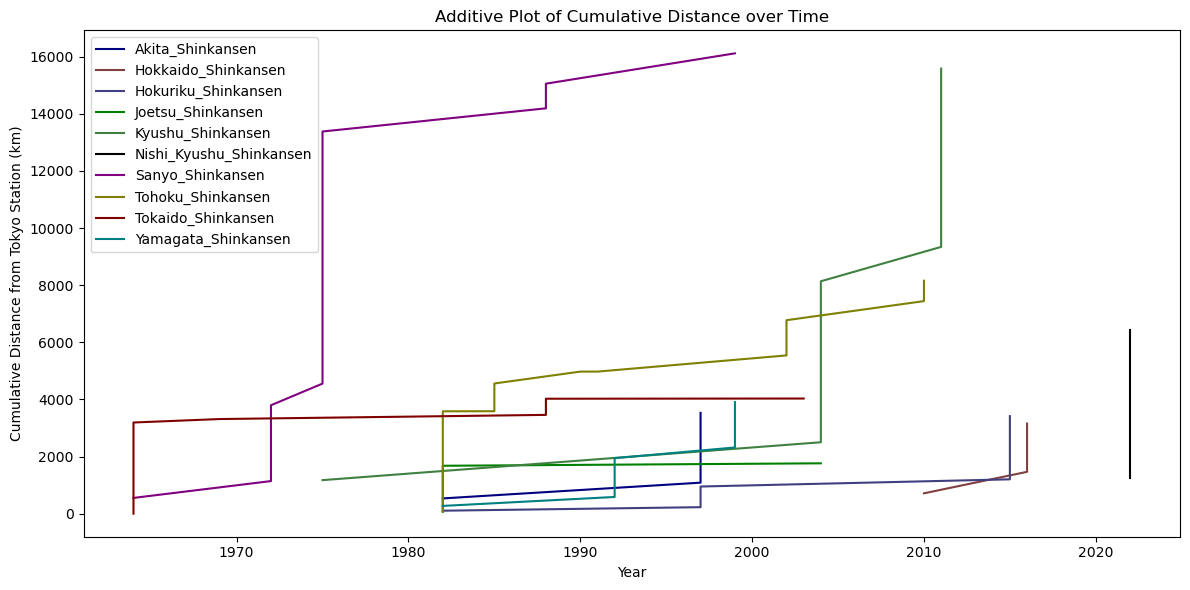

In [58]:
df_sorted = data_fused.sort_values(['Shinkansen_Line', 'Year'])

# Group the data by 'Shinkansen_Line'
grouped_data = df_sorted.groupby('Shinkansen_Line')

# Calculate the cumulative sum of distances for each group
cumulative_distances = grouped_data['Distance_from_Tokyo_st'].cumsum()

# Create a new DataFrame with the cumulative distances
df_cumulative = df_sorted.copy()
df_cumulative['Cumulative_Distance'] = cumulative_distances

# Color mapping for each line
line_colors = {
    'Tokaido_Shinkansen': '#800000',
    'Sanyo_Shinkansen': '#800080',
    'Tohoku_Shinkansen': '#808000',
    'Joetsu_Shinkansen': '#008000',
    'Yamagata_Shinkansen': '#008080',
    'Akita_Shinkansen': '#000080',
    'Hokuriku_Shinkansen': '#404080',
    'Kyushu_Shinkansen': '#408040',
    'Hokkaido_Shinkansen': '#804040',
    'Nishi_Kyushu_Shinkansen': '#000000'
}

# Plot the additive plot over time
plt.figure(figsize=(12, 6))

# Plot each line with the specified color
for line, data in df_cumulative.groupby('Shinkansen_Line'):
    plt.plot(data['Year'], data['Cumulative_Distance'], color=line_colors[line], label=line)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Cumulative Distance from Tokyo Station (km)')
plt.title('Additive Plot of Cumulative Distance over Time')

# Add legend
plt.legend(loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

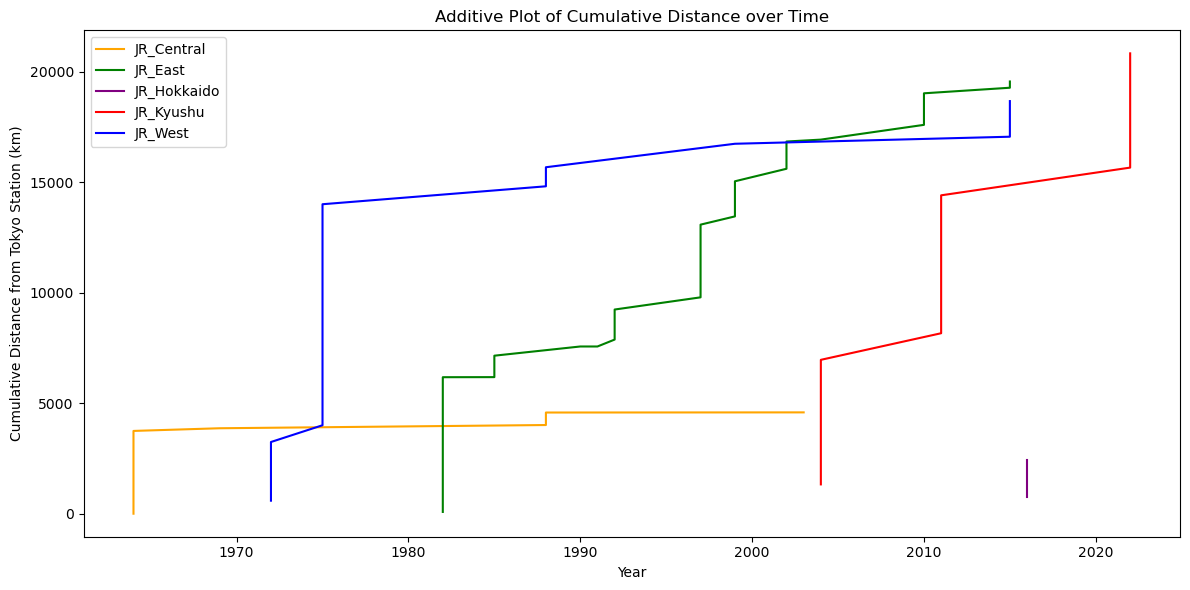

In [59]:
df_sorted = data_fused.sort_values(['Company', 'Year'])

# Group the data by 'Shinkansen_Line'
grouped_data = df_sorted.groupby('Company')

# Calculate the cumulative sum of distances for each group
cumulative_distances = grouped_data['Distance_from_Tokyo_st'].cumsum()

# Create a new DataFrame with the cumulative distances
df_cumulative = df_sorted.copy()
df_cumulative['Cumulative_Distance'] = cumulative_distances

# Color mapping for each line
line_colors = {
    'JR_Central': 'orange',
    'JR_East': 'green',
    'JR_West': 'blue',
    'JR_Kyushu': 'red',
    'JR_Hokkaido': 'purple',
}

# Plot the additive plot over time
plt.figure(figsize=(12, 6))

# Plot each line with the specified color
for line, data in df_cumulative.groupby('Company'):
    plt.plot(data['Year'], data['Cumulative_Distance'], color=line_colors[line], label=line)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Cumulative Distance from Tokyo Station (km)')
plt.title('Additive Plot of Cumulative Distance over Time')

# Add legend
plt.legend(loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()